# Climate Analysis

In [301]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [302]:
import numpy as np
import pandas as pd

In [303]:
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [304]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [305]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")
connection = engine.connect()

In [306]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [307]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [308]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [309]:
inspector = inspect(engine)

In [310]:
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [311]:
for table in tables:
    columns = inspector.get_columns(table)
    print(f"Table: {table}")
    for column in columns: 
        print(column["name"], column["type"])
    print("...")

Table: measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
...
Table: station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
...


In [312]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [313]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#find the most recent date recorded
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The last date entered is {last_date[0]}.")

The last date entered is 2017-08-23.


In [315]:
# Calculate the date 1 year ago from the last data point in the database
#find the date one year from the most recent/last data point in database
start_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)
print(f"The date one year prior to the last date is {start_date}.")

The date one year prior to the last date is 2016-08-22.


In [316]:
# Perform a query to retrieve the data and precipitation scores
# query to retrieve the last 12 months of precipitation data and plot the results
oneyear = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).\
    filter(Measurement.date > start_date).all()
oneyear

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [317]:
#unpack the date from the results of oneyear
date = [day[0] for day in oneyear[:]]
precip = [day[1] for day in oneyear[:]]

In [318]:
# Save the query results as a Pandas DataFrame and set the index to the date column
oneyear_df = pd.DataFrame(oneyear)
oneyear_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [319]:
#drop NaN values
oneyear_df = oneyear_df.dropna()
oneyear_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2224,2016-08-23,0.15
2225,2016-08-23,0.05
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [320]:
# change column names
# Sort the dataframe by date
# set index to date
oneyear_df = oneyear_df.rename(columns={"date":"Date", "prcp":"Precipitation"})
oneyear_df = oneyear_df.sort_values(by=["Date"])
oneyear_df = oneyear_df.set_index("Date")
oneyear_df

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


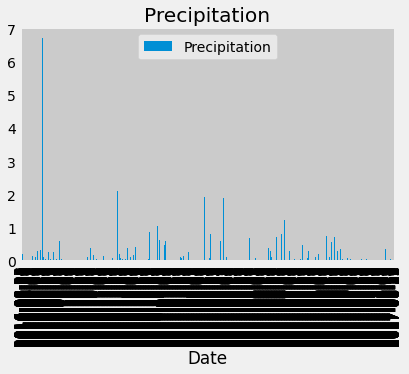

In [439]:
#Use Pandas Plotting with Matplotlib to plot the data
# fix, ax = plt.subplots()
# ax.bar(oneyear_df['Date'], oneyear_df['Precipitation'])
# ax.set_xlabel("Date")
# ax.set_ylabel("Precipitation (Inches)")
# ax.set_title("Precipitation in Inches by Date")
# fig.tight_layout()
# plt.show()
fig = oneyear_df.plot.bar(title="Precipitation")
# plt.tight_layout()

plt.savefig('../Images/Precipitation.png')
plt.show()

In [322]:
grouped_dates = oneyear_df.groupby(['Date'])
date_sum = grouped_dates['Precipitation'].sum()
date_sum

Date
2016-08-23    2.71
2016-08-24    9.33
2016-08-25    0.54
2016-08-26    0.10
2016-08-27    0.32
              ... 
2017-08-19    0.09
2017-08-20    0.01
2017-08-21    0.58
2017-08-22    0.50
2017-08-23    0.53
Name: Precipitation, Length: 366, dtype: float64

In [323]:
date_sum = pd.DataFrame(date_sum)
date_sum

,Precipitation
Date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


TypeError: xticks() takes from 0 to 2 positional arguments but 9 were given

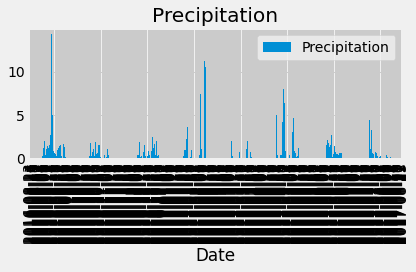

In [374]:
group_df.plot.bar(title="Precipitation")
plt.tight_layout()
plt.xticks("2016-08-23", "2016-010-01", "2016-11-09", "2016-12-19", "2017-01-28", "2017-03-09", "2017-04-18", "2017-05-31", "2017-08-23")
plt.show()

In [153]:
# Use Pandas to calcualte the summary statistics for the precipitation data
oneyear_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [335]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.id).count()
print(f"There are {station_count} stations")

There are 9 stations


In [334]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Station.station, Station.name, Measurement.date, Measurement.tobs]
station_obser = session.query(*sel, func.count(Measurement.tobs)).filter(Station.station == Measurement.station).\
    group_by(Station.name).order_by(func.count(Measurement.tobs).desc()).all()
for station in station_obser:
    print(station)

('USC00519281', 'WAIHEE 837.5, HI US', '2010-01-01', 70.0, 2772)
('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-01', 65.0, 2724)
('USC00513117', 'KANEOHE 838.1, HI US', '2010-01-01', 67.0, 2709)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', '2010-01-01', 75.0, 2669)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', '2010-01-01', 73.0, 2612)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', '2010-03-01', 67.0, 2202)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', '2010-01-01', 66.0, 1979)
('USC00517948', 'PEARL CITY, HI US', '2010-05-03', 75.0, 1372)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', '2010-01-01', 72.0, 511)


In [337]:
#Station with the most observations
top_station = session.query(*sel, func.count(Measurement.tobs)).filter(Station.station == Measurement.station).\
    group_by(Station.name).order_by(func.count(Measurement.tobs).desc()).first()
print(f"The station with the most observations is: {top_station[0]}:{top_station[1]} with {top_station[4]} observations.")

The station with the most observations is: USC00519281:WAIHEE 837.5, HI US with 2772 observations.


In [413]:
station_year = session.query(*sel, func.count(Measurement.tobs)).filter(Station.station == Measurement.station).\
    group_by(Station.name).filter(Measurement.date>start_date).order_by(func.count(Measurement.tobs).desc()).all()
for station in station_year:
    print(station)

('USC00519397', 'WAIKIKI 717.2, HI US', '2016-08-23', 81.0, 361)
('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-23', 77.0, 352)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', '2016-08-23', 74.0, 349)
('USC00513117', 'KANEOHE 838.1, HI US', '2016-08-23', 76.0, 343)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', '2016-08-23', 80.0, 337)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', '2016-08-23', 80.0, 305)
('USC00517948', 'PEARL CITY, HI US', '2016-08-23', 80.0, 183)


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [430]:
#Station with highest number of observations, temperature data for the last year
sel = [Station.station, Station.name, Measurement.date, Measurement.tobs]
top_station_temp_year = session.query(*sel).filter(Station.station == Measurement.station)\
    .filter(Measurement.date>start_date).filter(Station.station == 'USC00519281').order_by(Measurement.date).all()
top_station_temp_year

[('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-23', 77.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-24', 77.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-25', 80.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-26', 80.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-27', 75.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-28', 73.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-29', 78.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-30', 77.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-31', 78.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-09-01', 80.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-09-02', 80.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-09-03', 78.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-09-04', 78.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-09-05', 78.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-09-06', 73.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-09-07', 74.0),
 ('USC00519281', 'WAIHEE

In [431]:
#data frame for the previous set of data
top_year_temp_df = pd.DataFrame(top_station_temp_year)
top_year_temp_df = top_year_temp_df.rename(columns={"station":"Station","name":"Name","date":"Date","tobs":"Temperature"})
top_year_temp_df

,Station,Name,Date,Temperature
0,USC00519281,"WAIHEE 837.5, HI US",2016-08-23,77.0
1,USC00519281,"WAIHEE 837.5, HI US",2016-08-24,77.0
2,USC00519281,"WAIHEE 837.5, HI US",2016-08-25,80.0
3,USC00519281,"WAIHEE 837.5, HI US",2016-08-26,80.0
4,USC00519281,"WAIHEE 837.5, HI US",2016-08-27,75.0
...,...,...,...,...
347,USC00519281,"WAIHEE 837.5, HI US",2017-08-14,77.0
348,USC00519281,"WAIHEE 837.5, HI US",2017-08-15,77.0
349,USC00519281,"WAIHEE 837.5, HI US",2017-08-16,76.0
350,USC00519281,"WAIHEE 837.5, HI US",2017-08-17,76.0


In [432]:
#drop any nan files - there were none
top_year_temp_df = top_year_temp_df.dropna()
top_year_temp_df

,Station,Name,Date,Temperature
0,USC00519281,"WAIHEE 837.5, HI US",2016-08-23,77.0
1,USC00519281,"WAIHEE 837.5, HI US",2016-08-24,77.0
2,USC00519281,"WAIHEE 837.5, HI US",2016-08-25,80.0
3,USC00519281,"WAIHEE 837.5, HI US",2016-08-26,80.0
4,USC00519281,"WAIHEE 837.5, HI US",2016-08-27,75.0
...,...,...,...,...
347,USC00519281,"WAIHEE 837.5, HI US",2017-08-14,77.0
348,USC00519281,"WAIHEE 837.5, HI US",2017-08-15,77.0
349,USC00519281,"WAIHEE 837.5, HI US",2017-08-16,76.0
350,USC00519281,"WAIHEE 837.5, HI US",2017-08-17,76.0


## Histogram

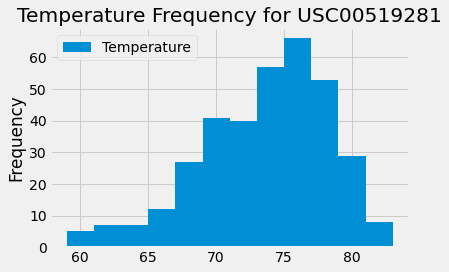

In [440]:
#histogram for the 12 months of data for the station with the highest number of temperature observations
fig = top_year_temp_df.plot.hist(bins=12, title="Temperature Frequency for USC00519281")
# plt.xlabel("Temperature F")
plt.tight_layout()

plt.savefig('../Images/Top_Station_Freq.png')
plt.show()

## Minimum, Maximum, and Average temperatures for station: USC00519281

In [449]:
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
functions = session.query(*sel).filter(Station.station == Measurement.station)\
        .filter(Measurement.date > start_date).filter(Station.station == 'USC00519281').all()
print(f"The minimum, maxiamum and average temperature for Station: USC00519281 are: {functions}")

The minimum, maxiamum and average temperatture for Station: USC00519281 are: [(59.0, 83.0, 73.10795454545455)]
